<a href="https://colab.research.google.com/github/xiiang0529/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl, plt
import sklearn
from sklearn import linear_model
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

<ipython-input-8-6cc3c390613b>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FuelConsumptionCo2.csv to FuelConsumptionCo2.csv


In [ ]:
df = pd.read_csv('FuelConsumptionCo2.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

NameError: ignored

In [ ]:
df.describe().round(2)

In [ ]:
df2=df[['ENGINESIZE', 'CO2EMISSIONS']]

In [ ]:
plt.scatter(df2['ENGINESIZE'], df2['CO2EMISSIONS'], color='pink')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show

In [ ]:
train=df2[:(int((len(df2)*0.8)))]
test=df2[(int((len(df2)*0.8))):]

# Using sklearn package to model data:

In [ ]:
regr=linear_model.LinearRegression()

In [ ]:
train_x=np.array(train[['ENGINESIZE']])
train_y=np.array(train[['CO2EMISSIONS']])

In [ ]:
regr.fit(train_x, train_y)

LinearRegression()

In [ ]:
print("coefficients: ", regr.coef_)  #Slope
print("Intercept: ", regr.intercept_)  #Intercept

coefficients:  [[38.79512384]]
Intercept:  [127.16989951]


Text(0, 0.5, 'Emission')

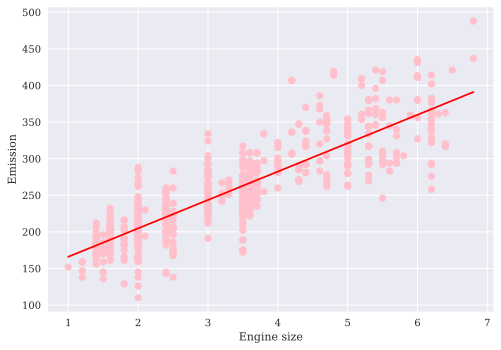

In [ ]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='pink')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

Prediction

In [ ]:
def get_regression_prediction(input_features, intercept,slope):
  predicted_values = input_features*slope + intercept
  return predicted_values

Checking various accuary

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
test_x=np.array(test[['ENGINESIZE']])
test_y=np.array(test[['CO2EMISSIONS']])
test_y_=regr.predict(test_x)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)** 2))
print("R2-Score:%.2f" % r2_score(test_y_ , test_y_))

Mean absolute error: 20.60
Mean sum of squares (MSE): 746.45
R2-Score:1.00
